In [2]:
import os
import numpy as np 
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import datasets, utils, layers, models, optimizers, metrics, losses

from PIL import Image

seed = 13
tf.random.set_seed(seed)
np.random.seed(seed)

In [30]:

def data_downscale(train, test, scale):
    (x_train,y_train) = train
    (x_test,y_test) = test
    num_train = len(x_train) // scale
    num_test = len(x_test) // scale
    x_train, y_train = x_train[:num_train], y_train[:num_train]
    x_test, y_test = x_test[:num_test], y_test[:num_test]
    x_train = x_train.reshape(num_train, (28*28)).astype(np.float32) /255.
    x_test = x_test.reshape(num_test, (28*28)).astype(np.float32) /255.
    return (x_train,y_train), (x_test,y_test)
    

def mnist_dataset():
    (x_train,y_train),(x_test,y_test) = datasets.mnist.load_data()
    (x_train,y_train),(x_test,y_test) = data_downscale((x_train,y_train),(x_test,y_test), 10)
    print(x_train.shape, y_train.shape)
    print(x_test.shape, y_test.shape)
    
    return (x_train,y_train), (x_test,y_test)

(x_train,y_train), (x_test,y_test) = mnist_dataset()

(6000, 784) (6000,)
(1000, 784) (1000,)


In [35]:
#del AE
class AE(models.Model):
    def __init__(self, image_size):
        super(AE, self).__init__()
        self.image_size = image_size
        self.model = self.create_model()
                
    def call(self, inputs):
        outputs = self.model(inputs)
        return outputs
    
    def create_model(self):
        model = models.Sequential()
        model.add(layers.Input(shape=(self.image_size,), name="inputs")) # 784
        model.add(layers.Dense(units=(self.image_size//2), activation="relu", name="fc1")) # 392
        model.add(layers.Dense(units=20, name="fc2")) # 20
        model.add(layers.Dense(units=(self.image_size//2), activation="relu", name="fc3")) # 392
        model.add(layers.Dense(units=self.image_size, activation="sigmoid", name="logits"))        
        model.summary()
        return model
    
image_size = 28*28
model = AE(image_size)

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
fc1 (Dense)                  (None, 392)               307720    
_________________________________________________________________
fc2 (Dense)                  (None, 20)                7860      
_________________________________________________________________
fc3 (Dense)                  (None, 392)               8232      
_________________________________________________________________
logits (Dense)               (None, 784)               308112    
Total params: 631,924
Trainable params: 631,924
Non-trainable params: 0
_________________________________________________________________


In [36]:
epochs = 3
batch_size = 128
model.compile(loss="binary_crossentropy", optimizer="adam",
                    metrics=["accuracy"])
def train():
    model.fit(x_train, x_train, validation_data=(x_test,x_test), epochs=epochs, batch_size=batch_size, verbose=1)

train()

Train on 6000 samples, validate on 1000 samples
Epoch 1/3
6000/6000 [==============================] - 4s 618us/sample - loss: 0.3371 - accuracy: 0.7653 - val_loss: 0.2353 - val_accuracy: 0.8020
Epoch 2/3
6000/6000 [==============================] - 1s 157us/sample - loss: 0.2027 - accuracy: 0.7957 - val_loss: 0.1801 - val_accuracy: 0.8076
Epoch 3/3
6000/6000 [==============================] - 1s 160us/sample - loss: 0.1655 - accuracy: 0.8010 - val_loss: 0.1580 - val_accuracy: 0.8128


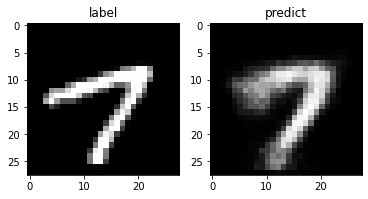

In [53]:
index = 101
predict = model.predict(x_train[index:index+1])
plt.subplot(1,2,1)
plt.title("label")
plt.imshow(x_train[index].reshape(28,28), cmap="gray")
predict = predict.reshape(28,28)
plt.subplot(1,2,2)
plt.imshow(predict, cmap="gray")
plt.title("predict")
plt.show()